In [30]:
#Data Understanding & Exploration (EDA)
import pandas as pd
df = pd.read_csv("laptop.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


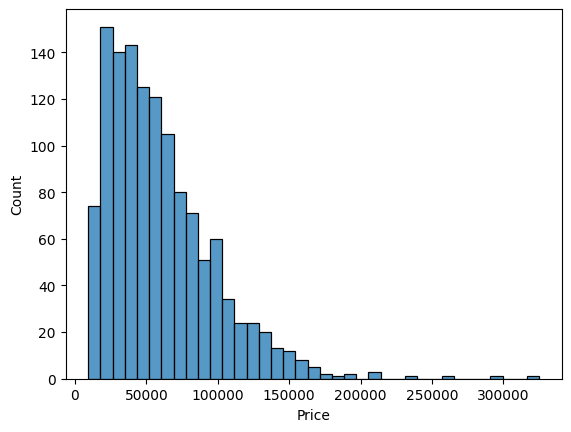

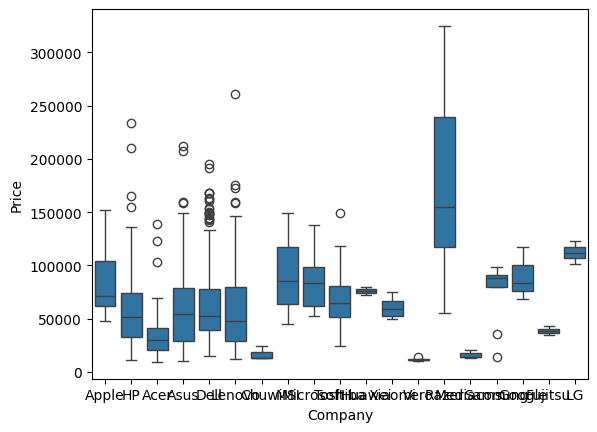

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price'])
plt.show()

sns.boxplot(x='Company', y='Price', data=df)
plt.show()

In [33]:
#Data Preprocessing
df = df.dropna()

In [34]:
import numpy as np
df.loc[:, 'Ram'] = df['Ram'].astype(str).str.replace('GB','').astype(int)
df.loc[:, 'Weight'] = df['Weight'].astype(str).str.replace('kg','').replace('?', np.nan).astype(float)

In [37]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)


In [39]:
df['CPU_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])

In [42]:
df = pd.get_dummies(df, drop_first=True)

In [43]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
#Model Development
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)


GradientBoostingRegressor()

In [45]:
#Model Evaluation
pred = gb.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))


R2: 0.7622523577497915
MAE: 11842.925687606683


In [46]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [51]:
new_laptop = {
    'Brand': 'Dell',
    'RAM': 16,
    'Weight': 1.5,
    'CPU_Brand': 'Intel',
    'SSD': 512,
    'HDD': 0
}


In [53]:
prediction = best_model.predict(new_laptop_processed)

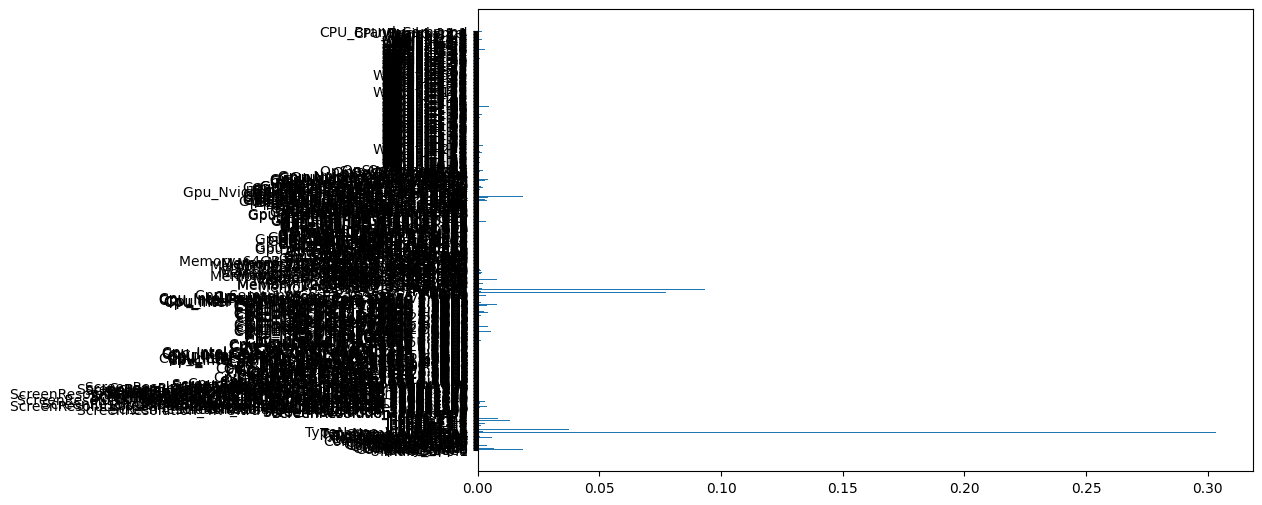

In [57]:
#Interpretability & Insights
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(X.columns, best_model.feature_importances_)
plt.show()


Impacting features :
CPU → biggest influence
GPU → gaming/workstation laptops
RAM
Brand
Storage type (SSD > HDD)

Accuracy may be lower due to fewer samples.

Premium brands (Apple, MSI, Asus ROG) have higher prices.

High-end: more error due to large price variation
Budget: more accurate

